In [2]:
# Données
eq_sport <- c(450.41, 412.48, 328.18, 500.12, 355.29)
eq_cult <- c(72.84, 66.13, 39.94, 56.91, 41.52)

# Écart-type de EqCult
s_eq_sport <- 69.73
s_eq_cult <- sd(eq_cult)
s_eq_cult

[1] 14.60487

In [3]:
# Fonction de distance euclidienne
distance <- function(x1, x2) {
  sqrt(sum((x1 - x2)^2))
}

# Pyrenees-Orientales vs Mayenne
pyrenees_orientales <- c(355.29, 41.52)
mayenne <- c(500.12, 56.91)

distance(pyrenees_orientales, mayenne)

[1] 145.6454

In [4]:
# Centres initiaux : Alpes-de-Haute-Provence et Mayenne
init_centers <- rbind(
  c(450.41, 72.84),  # Alpes-de-Haute-Provence
  c(500.12, 56.91)   # Mayenne
)

# Création du jeu de données
equipments <- data.frame(eq_sport, eq_cult)

# Calcul de la distance initiale
distances <- dist(equipments, method = "euclidean")

# Implémentation manuelle
kmeans_result <- kmeans(equipments, centers = init_centers)

# Partitions
kmeans_result$cluster

# Inertie intra-classe
kmeans_result$tot.withinss

[1] 2 2 1 2 1

[1] 4360.17

,sportif,culturel
Alpes-de-Haute-Provence,450.4111,72.83491
Dordogne,412.4799,66.12811
Landes,328.1777,39.94417
Mayenne,500.1208,56.91140
Pyrénées-Orientales,355.2887,41.51688


K-means clustering with 2 clusters of sizes 3, 2

Cluster means:
   sportif culturel
1 6.516064 4.471196
2 4.901106 2.789249

Clustering vector:
Alpes-de-Haute-Provence                Dordogne                  Landes 
                      1                       1                       2 
                Mayenne     Pyrénées-Orientales 
                      1                       2 

Within cluster sum of squares by cluster:
[1] 1.39416776 0.08139182
 (between_SS / total_SS =  81.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

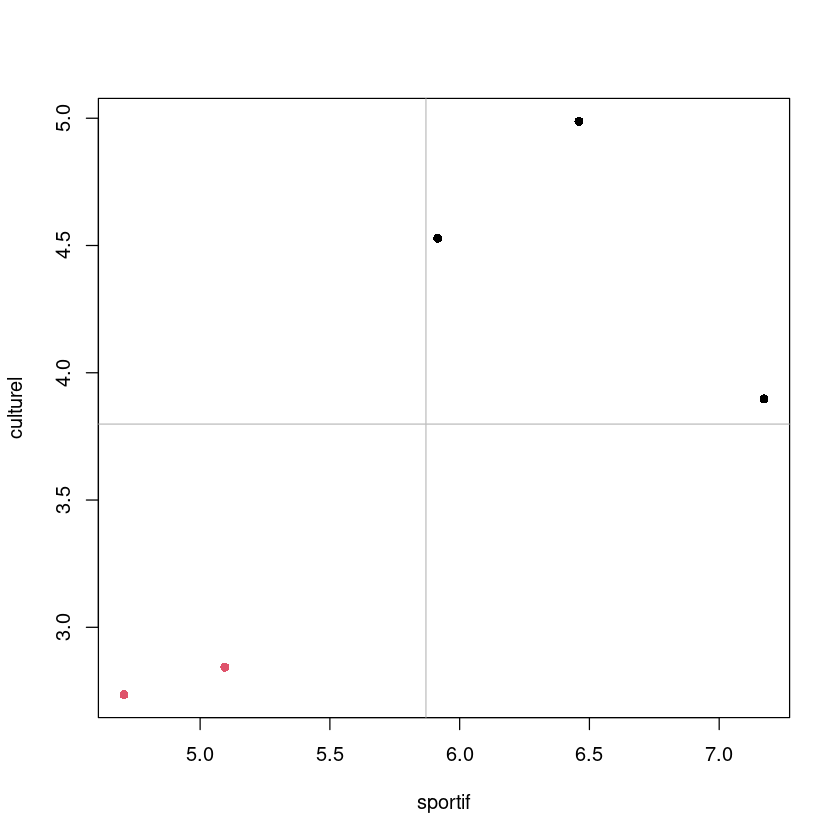

In [7]:
# Chargement des données
load("equip5.rds")
View(equip5)

# Normalisation des colonnes
equip5[, 1] <- equip5[, 1] / sd(equip5[, 1])
equip5[, 2] <- equip5[, 2] / sd(equip5[, 2])

# Distance
dist_matrix <- dist(equip5)

# Algorithme k-means avec centres initiaux
cl <- kmeans(x = equip5, centers = equip5[c(1, 5), ])
cl

# Visualisation
plot(equip5, col = cl$cluster, pch = 16)
abline(v = mean(equip5[, 1]), h = mean(equip5[, 2]), col = "grey")

,sportif,culturel
Ain,366.6257,42.95257
Aisne,437.0699,34.26539
Allier,410.3828,82.42606
Alpes-de-Haute-Provence,450.4111,72.83491
Hautes-Alpes,847.9859,89.04537
Alpes-Maritimes,154.3704,24.28099
Ardèche,335.6657,79.30725
Ardennes,443.4127,43.93850
Ariège,512.8398,64.65423
Aube,292.8704,58.51117


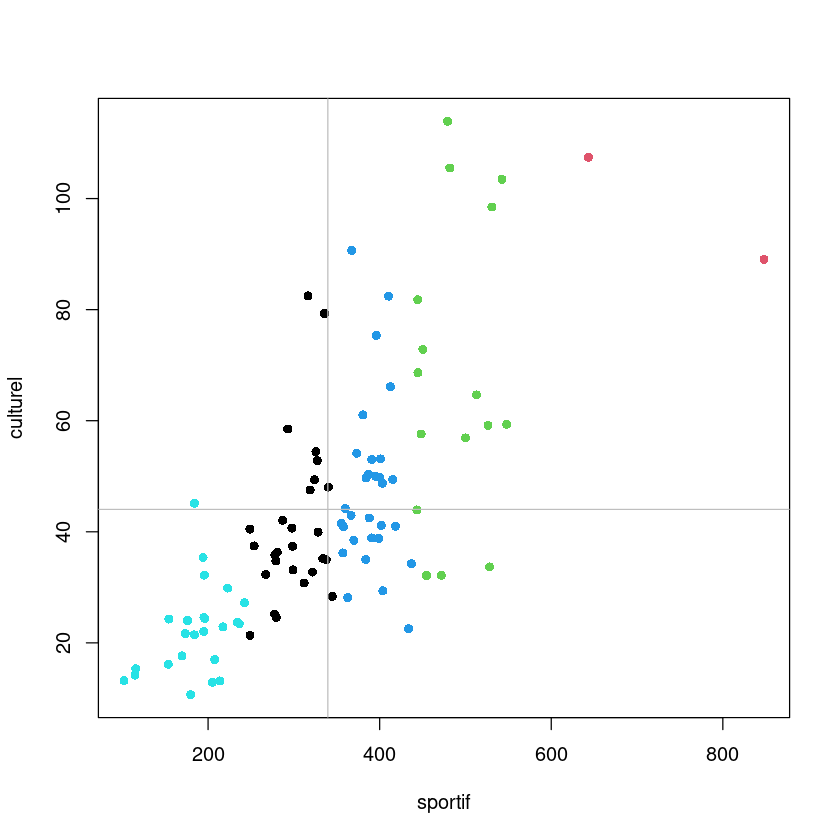

In [8]:
# Chargement du fichier equip.rds
load("equip.rds")
View(equip)

# Partitionnement
cl_all <- kmeans(x = equip, centers = 5)  # Choisir un nombre de centres arbitrairement
plot(equip, col = cl_all$cluster, pch = 16)
abline(v = mean(equip[, 1]), h = mean(equip[, 2]), col = "grey")

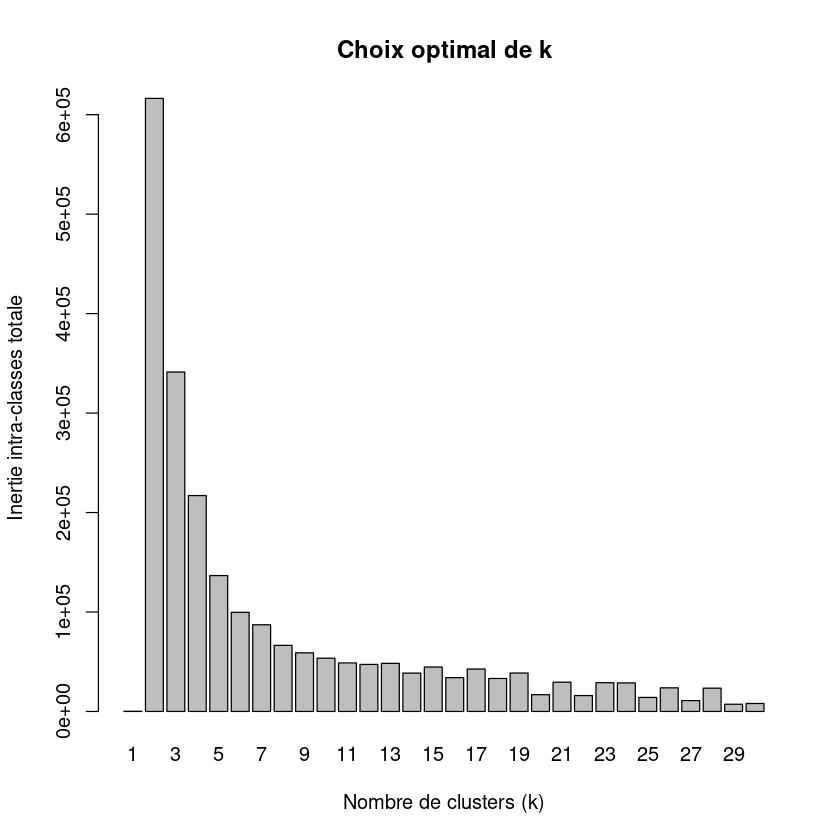

In [12]:
# Choix optimal de k
K <- 30
W <- rep(NA, K)
W[1] <- ncol(equip) * (nrow(equip) - 1)

for (k in 2:K) {
  # Échantillonner k centres initiaux
  centers <- equip[sample(1:nrow(equip), k), ]
  
  # Appliquer k-means avec les centres
  cl <- kmeans(x = equip, centers = centers)
  
  # Calculer l'inertie intra-classes totale
  W[k] <- cl$tot.withinss
}

# Visualisation
barplot(W, names.arg = 1:K, xlab = "Nombre de clusters (k)", ylab = "Inertie intra-classes totale", main = "Choix optimal de k")

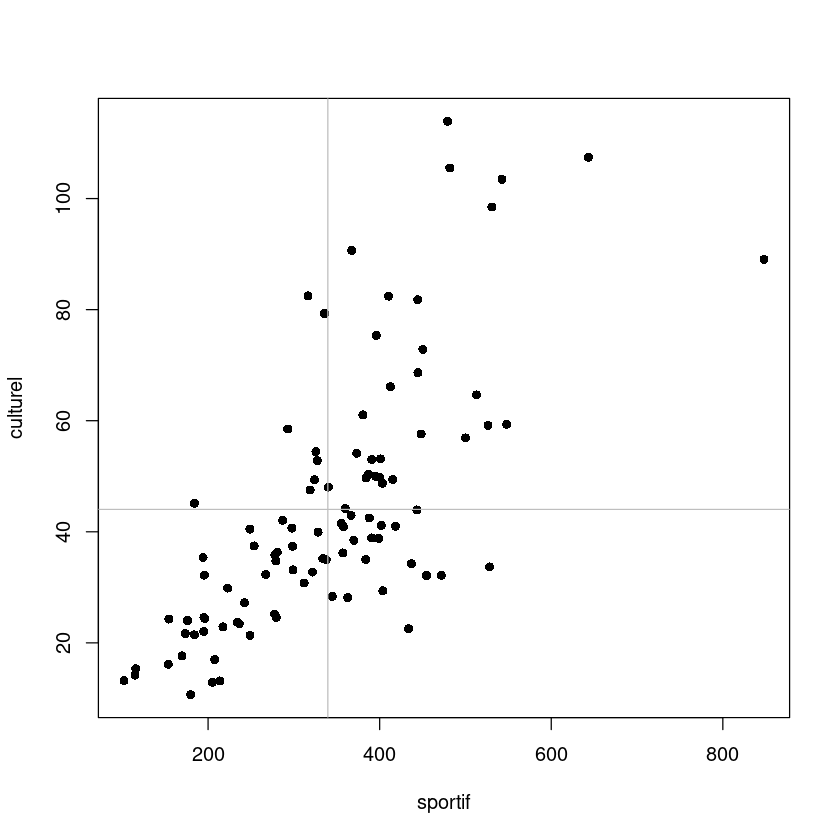

In [13]:
# Choisir k optimal basé sur la méthode précédente
optimal_k <- which.min(W)

# Repartition avec le k optimal
final_cl <- kmeans(equip, centers = optimal_k)

# Visualisation
plot(equip, col = final_cl$cluster, pch = 16)
abline(v = mean(equip[, 1]), h = mean(equip[, 2]), col = "grey")